<a href="https://colab.research.google.com/github/makkolli31/StillWork/blob/master/StillWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# univariate cnn example
from numpy import array
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import BatchNormalization
import pandas as pd
import numpy as np


Using TensorFlow backend.


In [13]:
#col_names_new = ['RequestRPM', 'CurrentRPM','WaterFreq', 'vibX', 'vibY', 'vibZ', 'UB', 'QCurrent2', 'RinseStep']
#df = pd.read_csv("/content/drive/My Drive/StillWork/V600_no01_1kgTowel_C3_HIGH_20190611_01_001.txt1_Extract.txt", sep=' ', header=None)
#df.columns = col_names_new
df1 = pd.read_csv("/content/drive/My Drive/StillWork/1kgTowel_Extract.txt", sep=' ')
df2 = pd.read_csv("/content/drive/My Drive/StillWork/T셔츠_Extract.txt", sep=' ')
df3 = pd.read_csv("/content/drive/My Drive/StillWork/Y셔츠_Extract.txt", sep=' ')
df4 = pd.read_csv("/content/drive/My Drive/StillWork/동1타200_Extract.txt", sep=' ')
df5 = pd.read_csv("/content/drive/My Drive/StillWork/동잠바_Extract.txt", sep=' ')
df6 = pd.read_csv("/content/drive/My Drive/StillWork/실용2_Extract.txt", sep=' ')
df7 = pd.read_csv("/content/drive/My Drive/StillWork/실용3_Extract.txt", sep=' ')
df8 = pd.read_csv("/content/drive/My Drive/StillWork/실용4_Extract.txt", sep=' ')
df9 = pd.read_csv("/content/drive/My Drive/StillWork/청바지_Extract.txt", sep=' ')
df10 = pd.read_csv("/content/drive/My Drive/StillWork/청팬티_Extract.txt", sep=' ')
df11 = pd.read_csv("/content/drive/My Drive/StillWork/추잠바_Extract.txt", sep=' ')
df12 = pd.read_csv("/content/drive/My Drive/StillWork/타월2_Extract.txt", sep=' ')
df13 = pd.read_csv("/content/drive/My Drive/StillWork/타월3_Extract.txt", sep=' ')
df14 = pd.read_csv("/content/drive/My Drive/StillWork/타월4_Extract.txt", sep=' ')
df15 = pd.read_csv("/content/drive/My Drive/StillWork/후드티_Extract.txt", sep=' ')

df_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=0)

#with pd.option_context('display.float_format', '{:0.2f}'.format):
df_data.describe()

,RequestRPM,CurrentRPM,WaterFreq,vibX,vibY,vibZ,UB,QCurrent2,RinseStep
count,1.181652e+07,1.181652e+07,1.181652e+07,1.181652e+07,1.181652e+07,1.181652e+07,1.181652e+07,1.181652e+07,11816515.0
mean,4.614447e+01,4.371706e+01,2.325486e+02,4.848985e+02,6.253674e+02,4.369962e+02,6.655774e+02,1.076428e+03,8.0
std,6.356907e+00,1.187683e+01,8.948155e+00,3.688567e+02,8.333832e+02,7.062617e+02,1.051788e+03,5.641362e+02,0.0
min,3.000000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.0
25%,4.600000e+01,4.300000e+01,2.300000e+02,2.520000e+02,2.810000e+02,2.150000e+02,1.800000e+02,6.780000e+02,8.0
50%,4.600000e+01,4.600000e+01,2.330000e+02,3.820000e+02,3.950000e+02,2.970000e+02,3.040000e+02,9.670000e+02,8.0
75%,4.600000e+01,4.800000e+01,2.350000e+02,5.920000e+02,5.990000e+02,4.380000e+02,5.580000e+02,1.372000e+03,8.0
max,4.800000e+02,4.830000e+02,2.480000e+02,1.280600e+04,1.723300e+04,1.989800e+04,5.850800e+04,1.254600e+04,8.0


In [14]:

X1 = df1[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X2 = df2[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X3 = df3[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X4 = df4[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X5 = df5[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X6 = df6[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X7 = df7[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X8 = df8[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X9 = df9[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X10 = df10[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X11 = df11[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X12 = df12[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X13 = df13[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X14 = df14[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
X15 = df15[['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'QCurrent2']].values
# X = np.vstack((X,df[['RequestRPM', 'vibX']].values))
# X = np.vstack((X,df[['RequestRPM', 'vibX']].values))
# X = np.vstack((X,df[['RequestRPM', 'vibX']].values))
# X = np.row_stack([X, df[['RequestRPM', 'vibX']].values])

print(X1.shape)
print(X1[:4])

(1199879, 5)
[[   1  974 3935 1479  582]
 [   3  974 3935 1479  968]
 [   5  974 3935 1479 1277]
 [  12  974 3935 1479 1351]]


In [0]:
def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(0,len(sequences), n_steps_in):
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # check if we are beyond the dataset
    if out_end_ix > len(sequences):
        break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [31]:
X1_data, _ = split_sequences(X1, 140, 1)
X2_data, _ = split_sequences(X2, 140, 1)
X3_data, _ = split_sequences(X3, 140, 1)
X4_data, _ = split_sequences(X4, 140, 1)
X5_data, _ = split_sequences(X5, 140, 1)
X6_data, _ = split_sequences(X6, 140, 1)
X7_data, _ = split_sequences(X7, 140, 1)
X8_data, _ = split_sequences(X8, 140, 1)
X9_data, _ = split_sequences(X9, 140, 1)
X10_data, _ = split_sequences(X10, 140, 1)
X11_data, _ = split_sequences(X11, 140, 1)
X12_data, _ = split_sequences(X12, 140, 1)
X13_data, _ = split_sequences(X13, 140, 1)
X14_data, _ = split_sequences(X14, 140, 1)
X15_data, _ = split_sequences(X15, 140, 1)
#n_features = X.shape[1]
# X_data = X.reshape(-1, X.shape[0], X.shape[1])

X_data = np.vstack((X1_data, X2_data, X3_data, X4_data, X5_data, X6_data, X7_data, X8_data, X9_data, X10_data, X11_data, X12_data, X13_data, X14_data, X15_data))

y1 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], (X1_data.shape[0],1))
y2 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], (X2_data.shape[0],1))
y3 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], (X3_data.shape[0],1))
y4 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], (X4_data.shape[0],1))
y5 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], (X5_data.shape[0],1))
y6 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], (X6_data.shape[0],1))
y7 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], (X7_data.shape[0],1))
y8 = np.tile([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], (X8_data.shape[0],1))
y9 = np.tile([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], (X9_data.shape[0],1))
y10 = np.tile([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X10_data.shape[0],1))
y11 = np.tile([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X11_data.shape[0],1))
y12 = np.tile([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X12_data.shape[0],1))
y13 = np.tile([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X13_data.shape[0],1))
y14 = np.tile([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X14_data.shape[0],1))
y15 = np.tile([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X15_data.shape[0],1))
y = np.vstack((y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15))

print(X1_data.shape, y1.shape)
print(X2_data.shape, y2.shape)
print(X_data.shape, y.shape)

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from matplotlib import pyplot as plt
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2)
X_train.shape , y_train.shape
#for i in range(1):
    #print(X_data[i], y[i])
    #print(X_data[X1_data.shape[0]], y[X1_data.shape[0]])

(8570, 140, 5) (8570, 15)
(6050, 140, 5) (6050, 15)
(84395, 140, 5) (84395, 15)


((67516, 140, 5), (67516, 15))

In [38]:
# define model
model = Sequential()
model.add(Conv1D(256, 2, activation='relu', padding='same', input_shape=(X_data.shape[1], X_data.shape[2]))) 
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 2, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 2, activation='relu', padding='same'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(25, activation='relu'))
model.add(Dense(15, activation='softmax'))
#model.compile(optimizer='adam', loss='mse')
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 140, 256)          2816      
_________________________________________________________________
batch_normalization_5 (Batch (None, 140, 256)          1024      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 70, 256)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 70, 256)           131328    
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 35, 256)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 35, 256)           131328    
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 7, 256)           

In [39]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
]

BATCH_SIZE = 300
EPOCHS = 30

history = model.fit(X_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

_, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

print(accuracy)
# demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

Train on 54012 samples, validate on 13504 samples
Epoch 1/30
54012/54012 [==============================] - 91s 2ms/step - loss: 1.6785 - acc: 0.3992 - val_loss: 1.4851 - val_acc: 0.4378
Epoch 2/30
54012/54012 [==============================] - 91s 2ms/step - loss: 1.1205 - acc: 0.5868 - val_loss: 0.9914 - val_acc: 0.6375
Epoch 3/30
54012/54012 [==============================] - 92s 2ms/step - loss: 0.9036 - acc: 0.6771 - val_loss: 0.9126 - val_acc: 0.6645
Epoch 4/30
54012/54012 [==============================] - 92s 2ms/step - loss: 0.7877 - acc: 0.7211 - val_loss: 0.9095 - val_acc: 0.6648
Epoch 5/30
54012/54012 [==============================] - 94s 2ms/step - loss: 0.7301 - acc: 0.7425 - val_loss: 0.8153 - val_acc: 0.7045
Epoch 6/30
54012/54012 [==============================] - 94s 2ms/step - loss: 0.6649 - acc: 0.7656 - val_loss: 0.8445 - val_acc: 0.6929
Epoch 7/30
54012/54012 [==============================] - 94s 2ms/step - loss: 0.6618 - acc: 0.7654 - val_loss: 0.6529 - val_acc

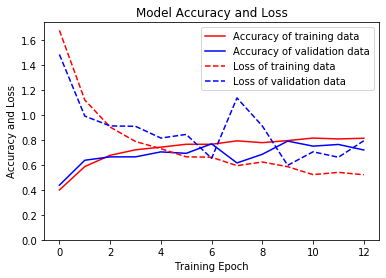

In [40]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [0]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels='auto',
                yticklabels='auto',
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

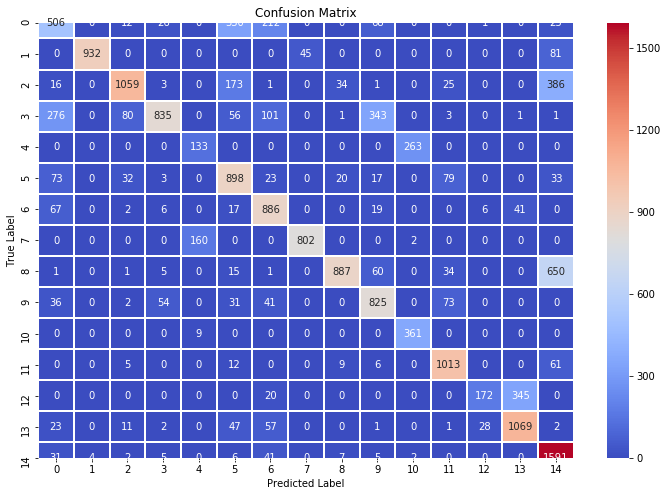

              precision    recall  f1-score   support

           0       0.49      0.43      0.46      1180
           1       1.00      0.88      0.93      1058
           2       0.88      0.62      0.73      1698
           3       0.89      0.49      0.63      1697
           4       0.44      0.34      0.38       396
           5       0.57      0.76      0.65      1178
           6       0.64      0.85      0.73      1044
           7       0.95      0.83      0.89       964
           8       0.93      0.54      0.68      1654
           9       0.61      0.78      0.69      1062
          10       0.57      0.98      0.72       370
          11       0.82      0.92      0.87      1106
          12       0.83      0.32      0.46       537
          13       0.73      0.86      0.79      1241
          14       0.56      0.94      0.70      1694

    accuracy                           0.71     16879
   macro avg       0.73      0.70      0.69     16879
weighted avg       0.75   

In [44]:
y_pred_test = model.predict(X_test)
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [0]:
#print(X_data[X1_data.shape[0]].reshape(1, 140, 5))
print(y[3].reshape(1, 1, 15))
for i in range(X_data.shape[0]):
  x_input = X_data[i].reshape(1, 140, 5)
  yhat = model.predict(x_input, verbose=0)
  print([ "{:0.2f}".format(x) for x in yhat[0] ])

In [0]:
from google.colab import files
files.upload()